# Visualizing Word2Vec Word Embeddings using t-SNE
## 1. Visualizaing Similar Words from Google News

In [1]:
import gensim

import gensim.downloader as api
model_gn = api.load('glove-twitter-100')

#model_gn = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

[===========================================-------] 86.4% 334.5/387.1MB downloaded


In [6]:
keys = ['football', 'python', 'sunday', 'obama', 'twitter', 'expensive',
        'experience', 'financial', 'food', 'ios', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_gn.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

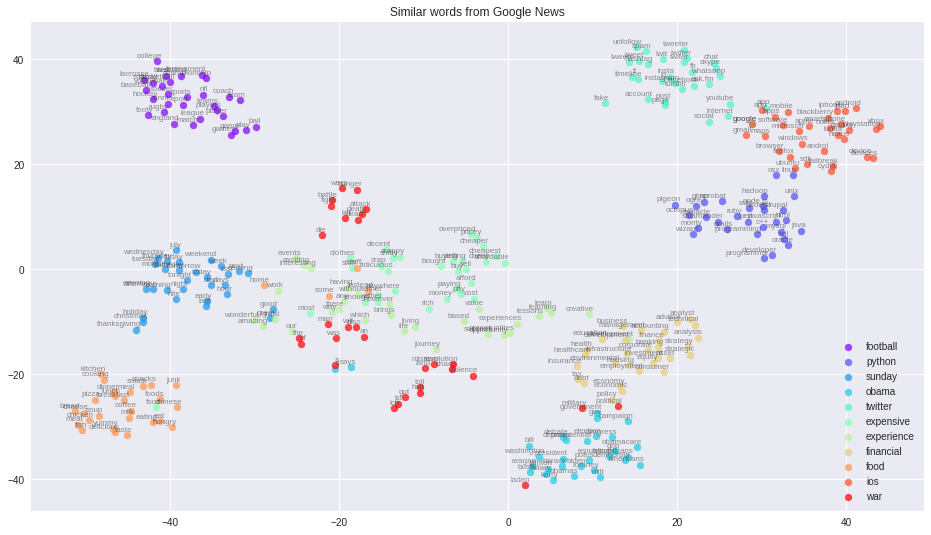

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

## GIFs

In [9]:
keys = ['football', 'python', 'sunday', 'obama', 'twitter', 'expensive',
        'experience', 'financial', 'food', 'ios', 'war']

embedding_clusters_gif = []
word_clusters_gif = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_gn.most_similar(word, topn=200):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters_gif.append(embeddings)
    word_clusters_gif.append(words)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters_gif = np.array(embedding_clusters_gif)
n, m, k = embedding_clusters_gif.shape

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

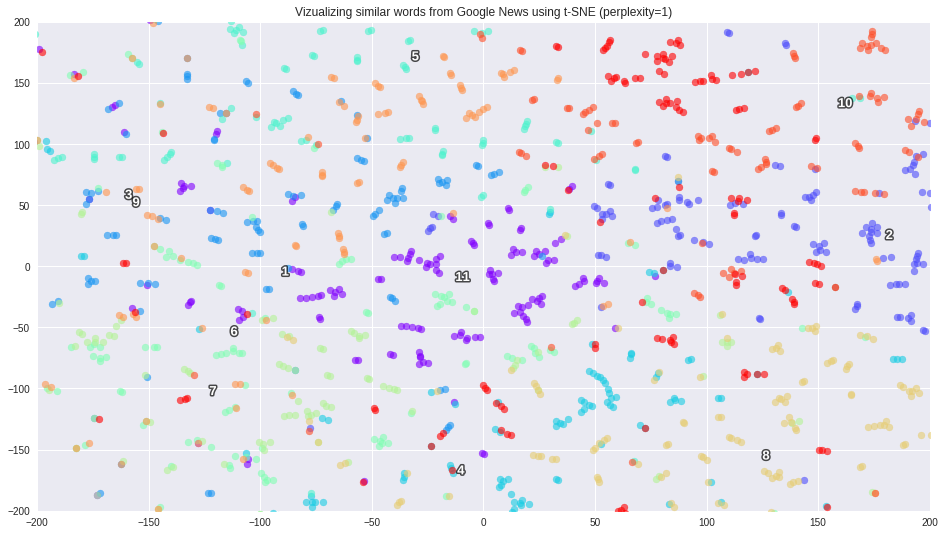

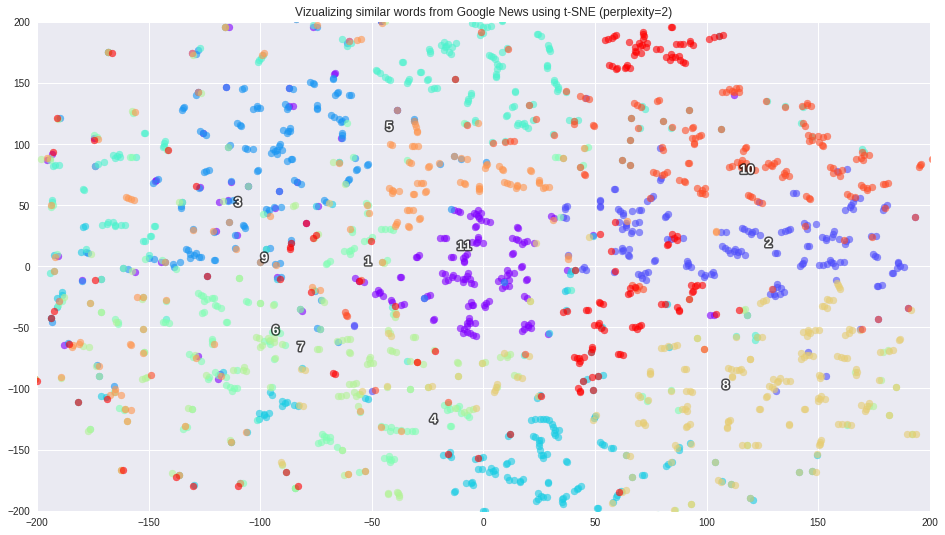

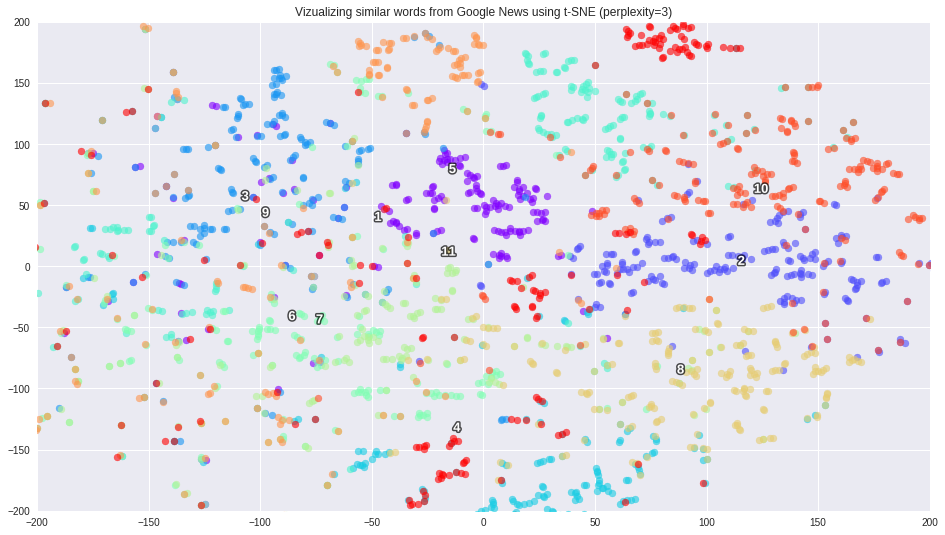

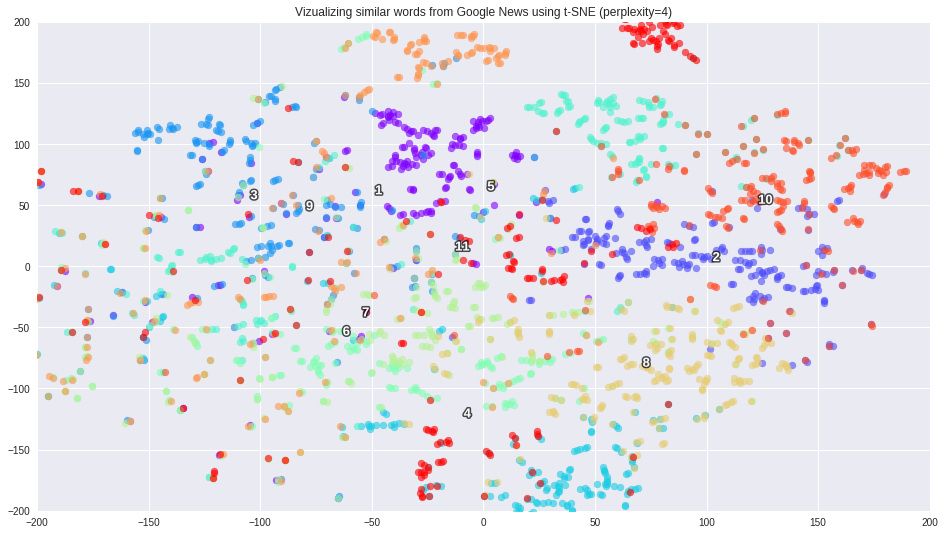

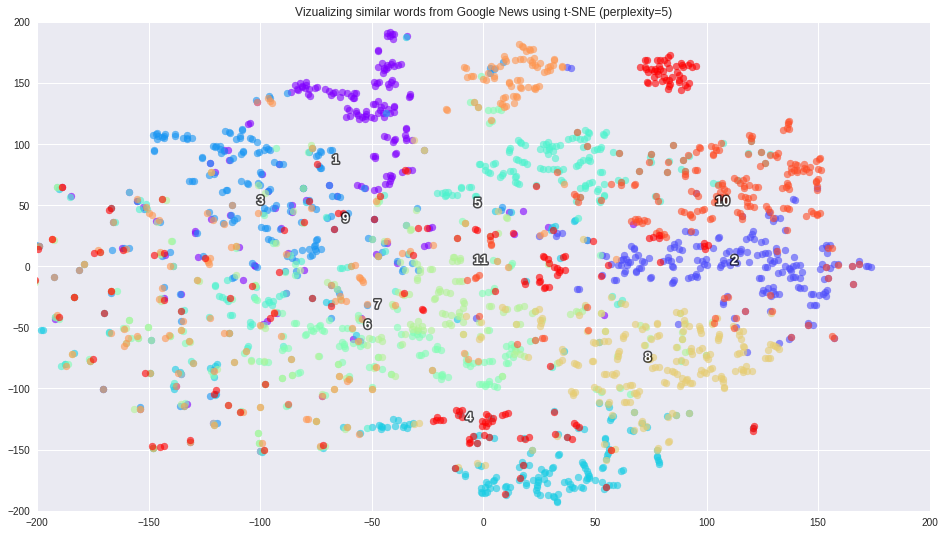

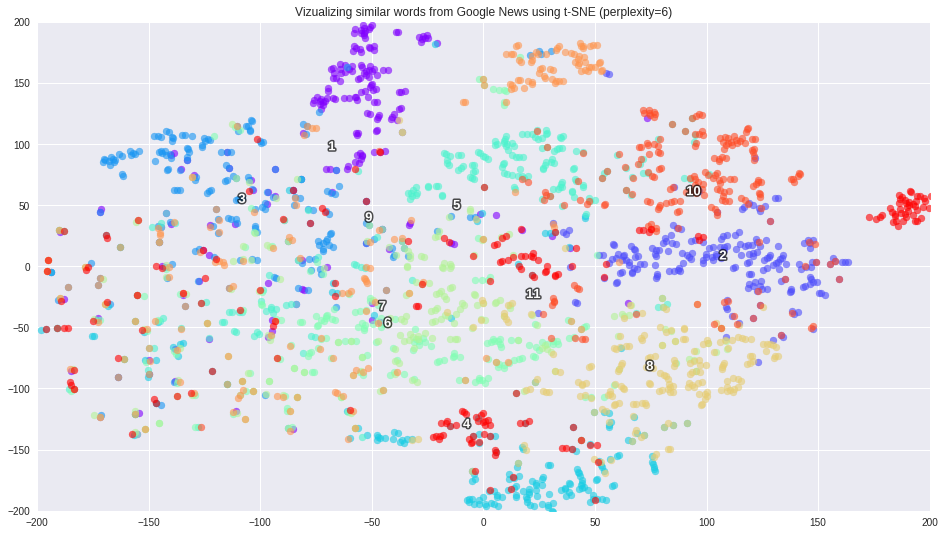

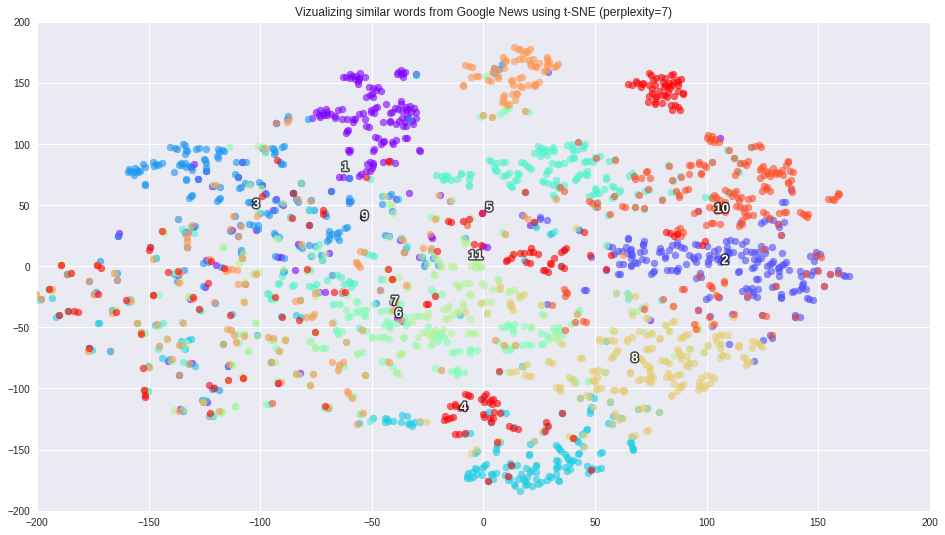

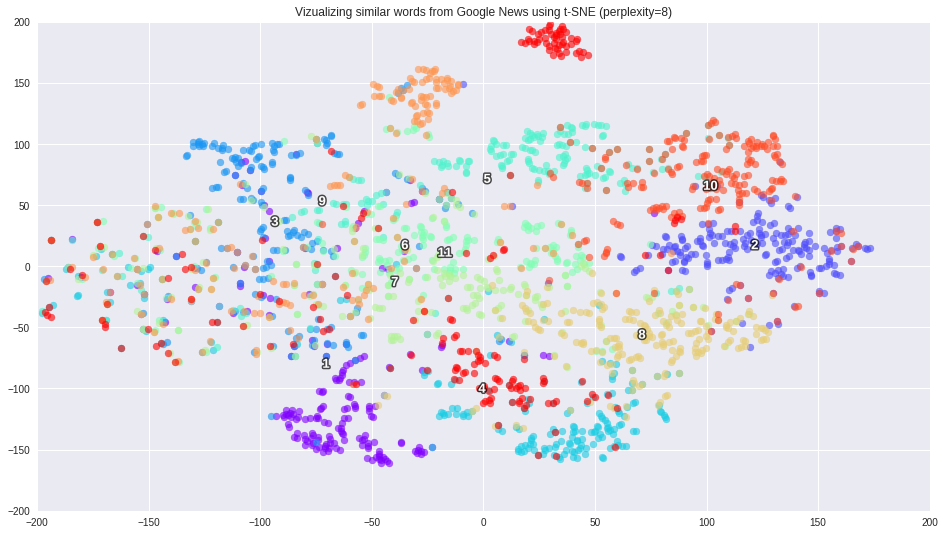

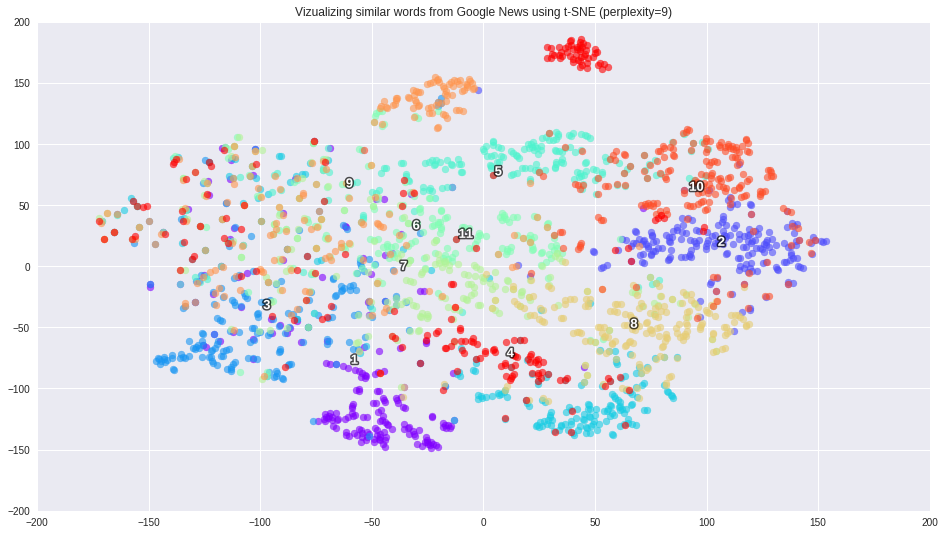

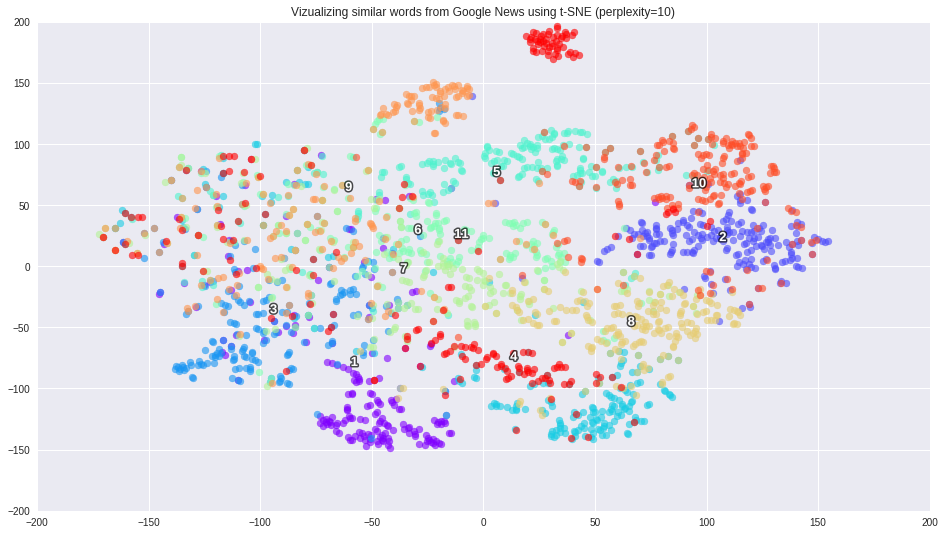

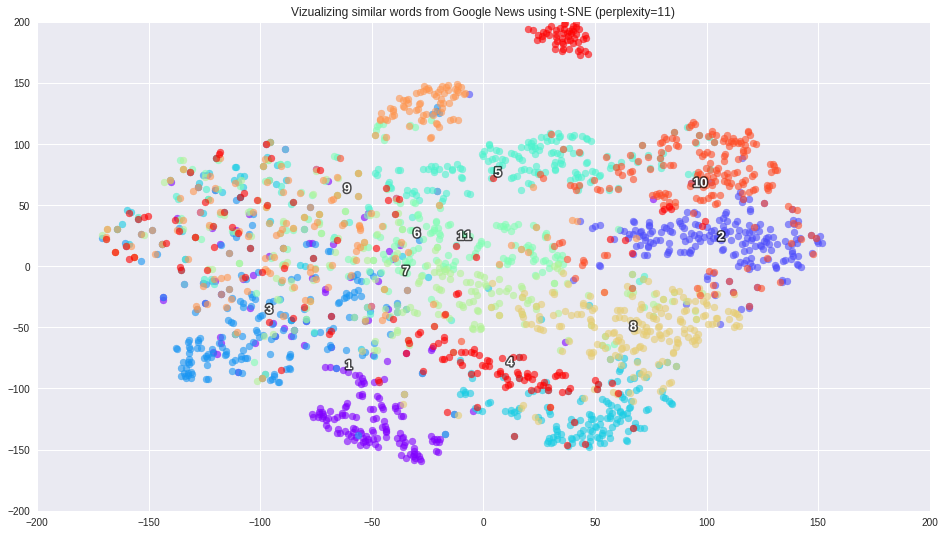

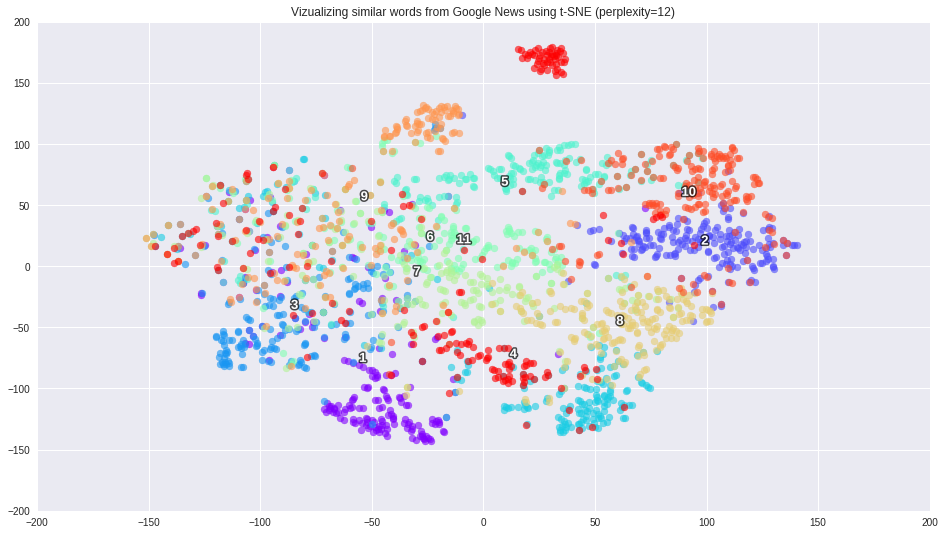

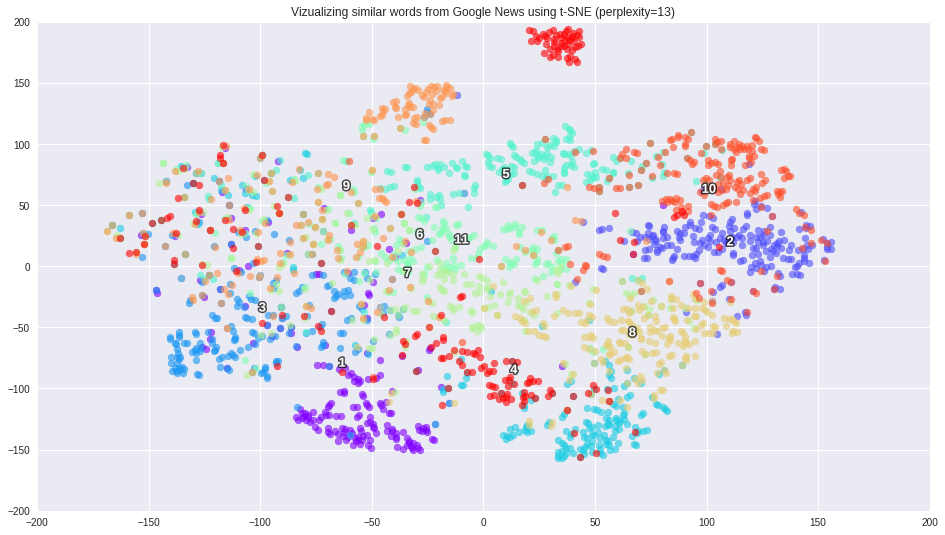

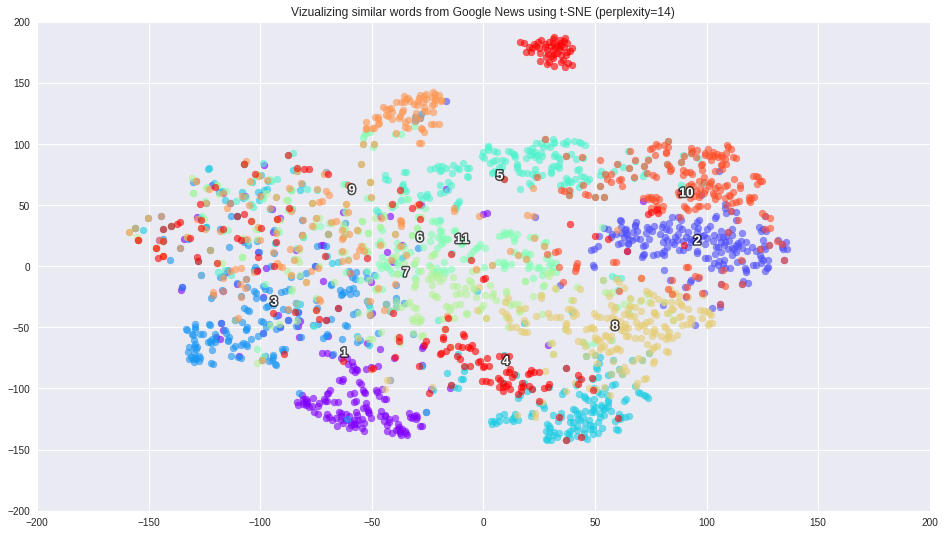

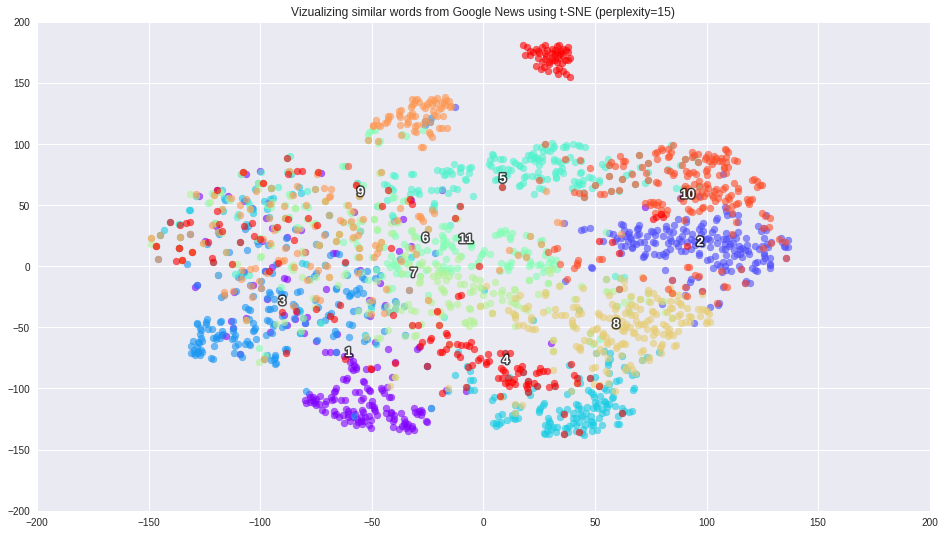

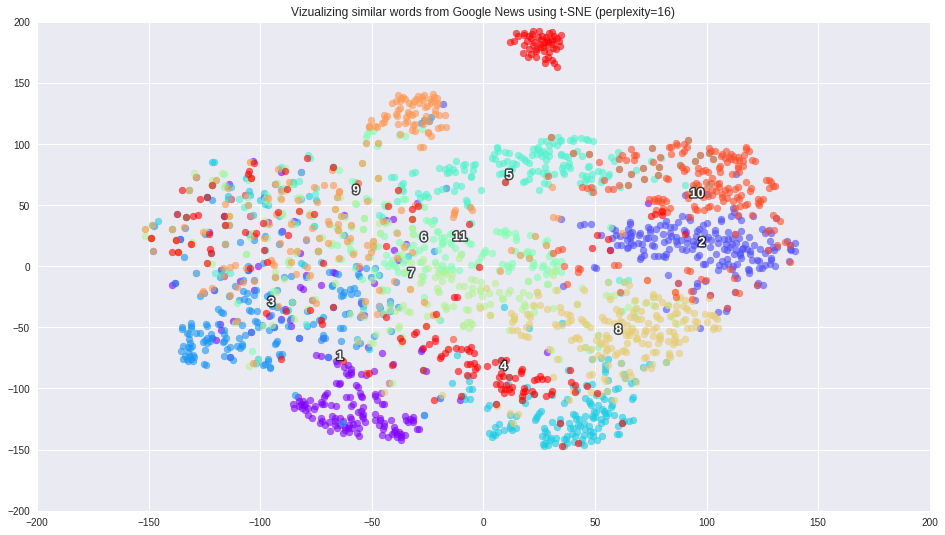

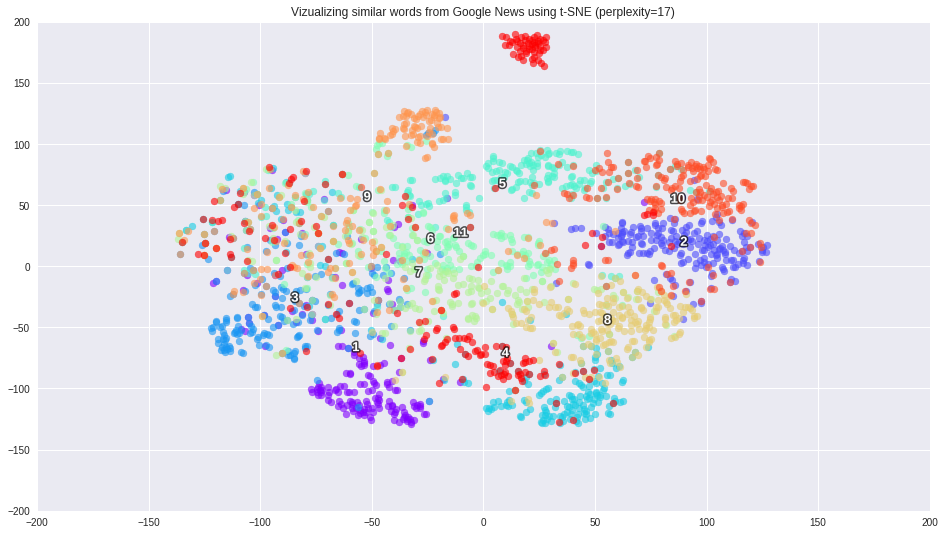

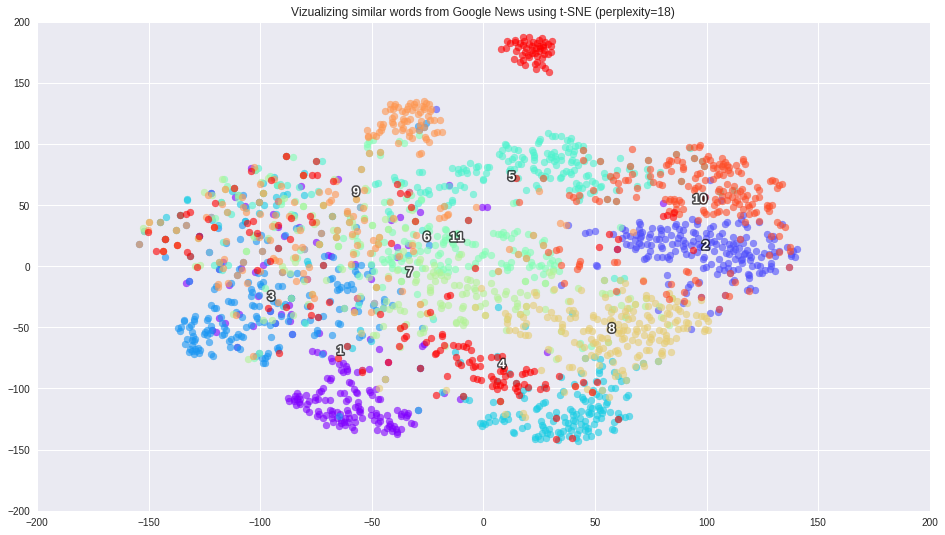

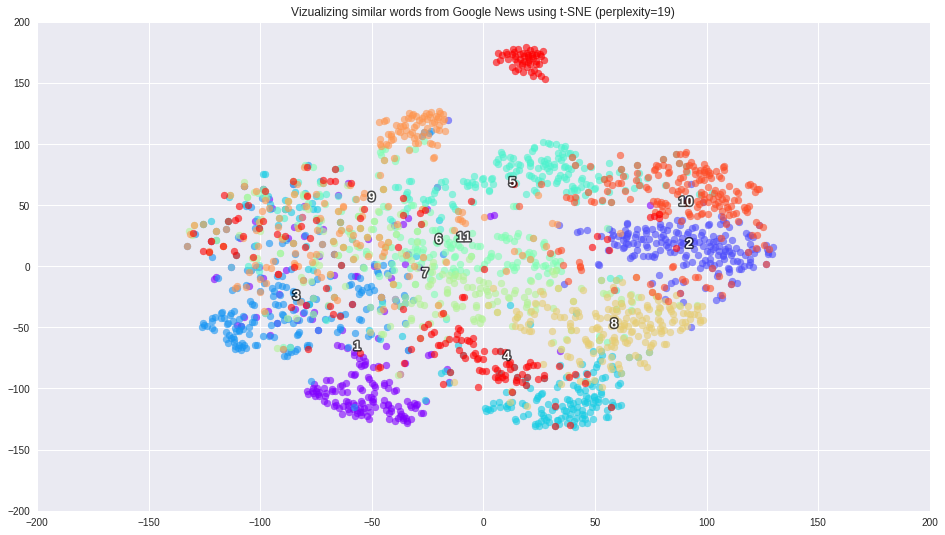

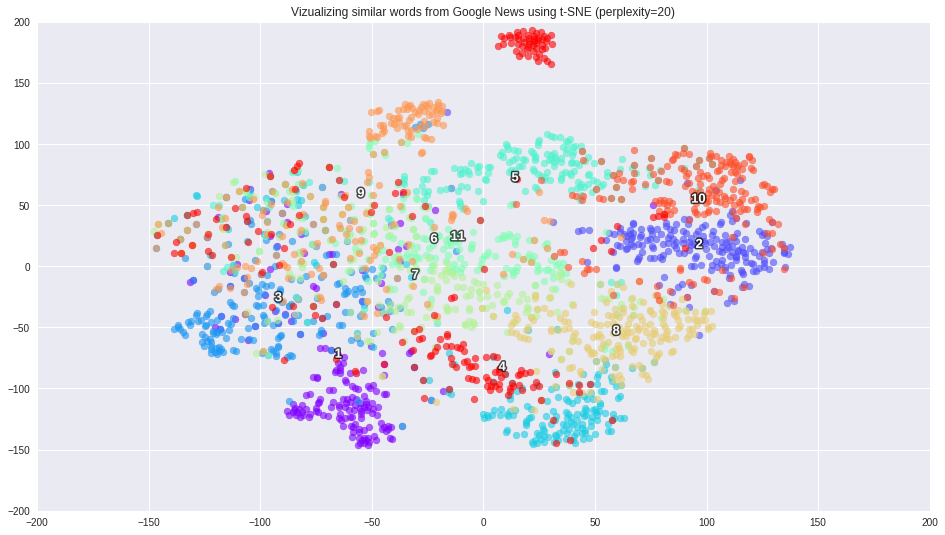

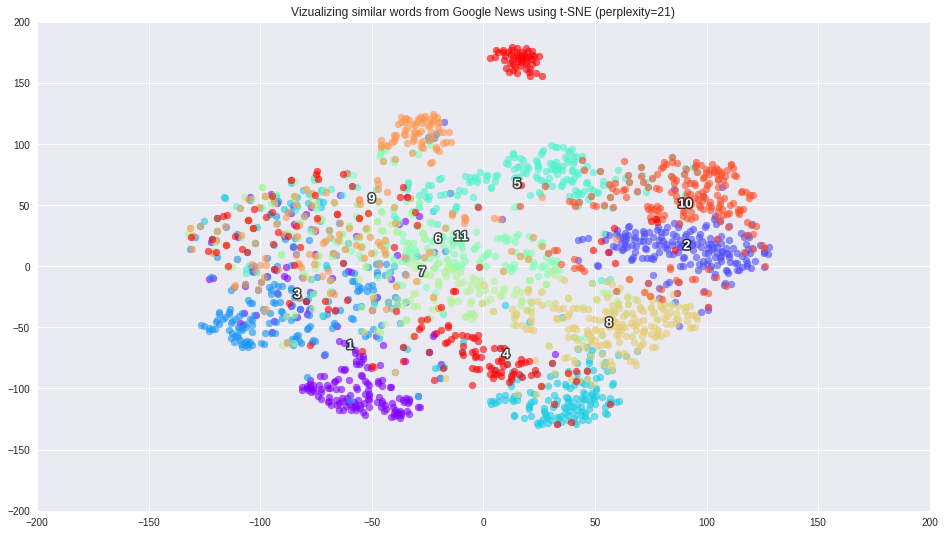

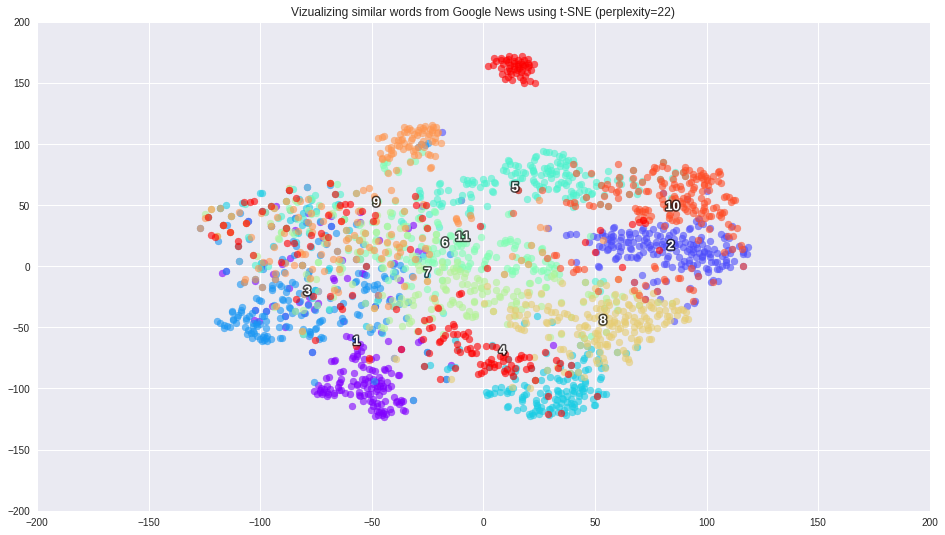

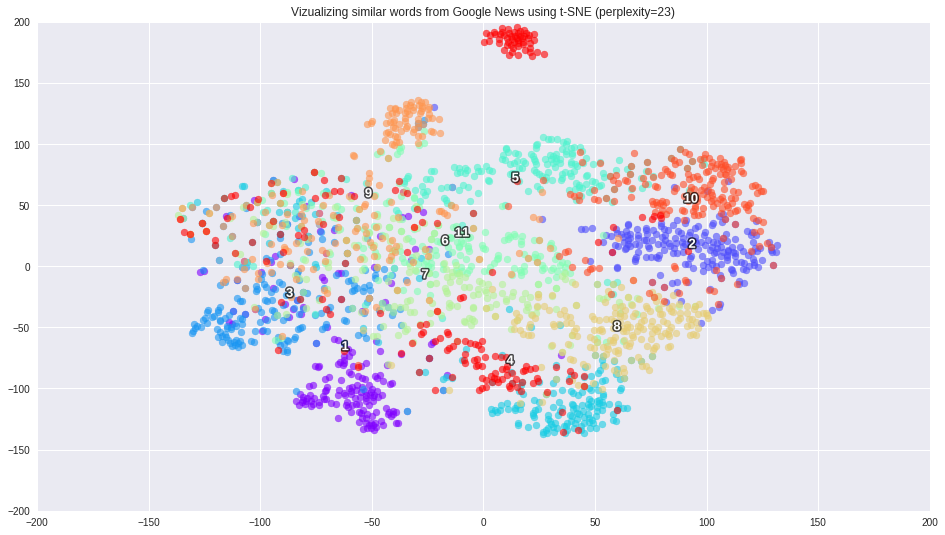

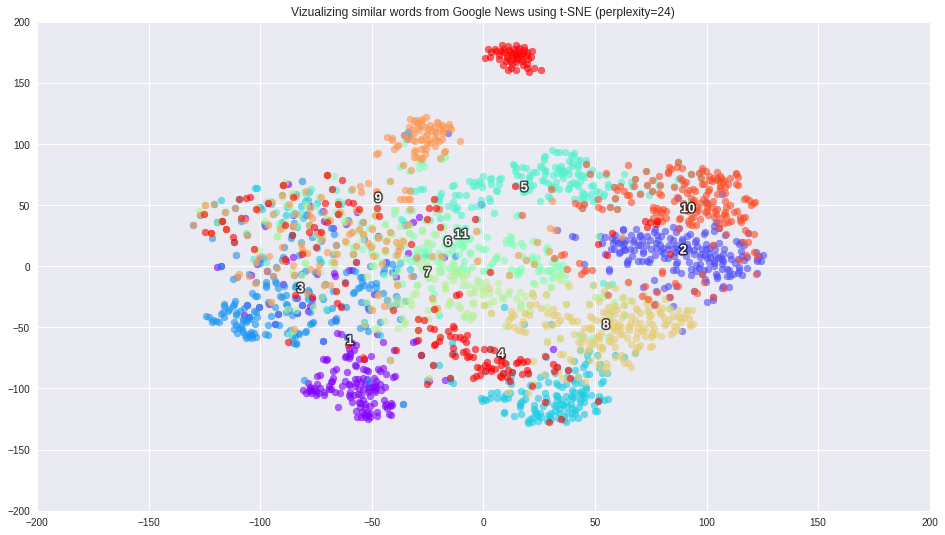

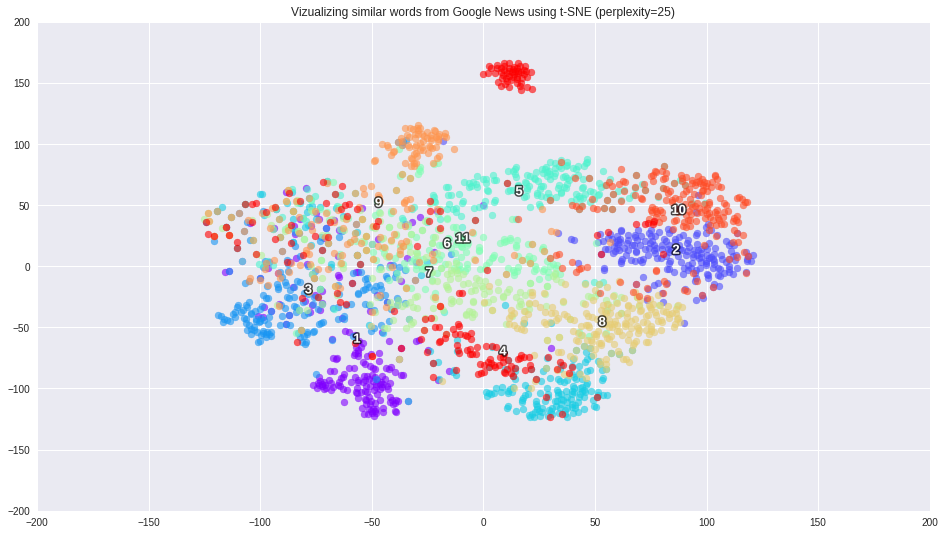

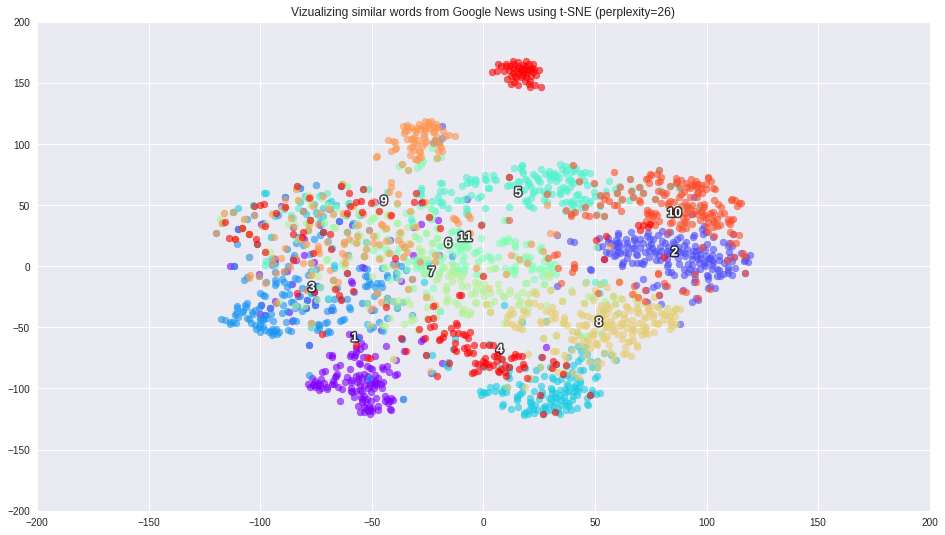

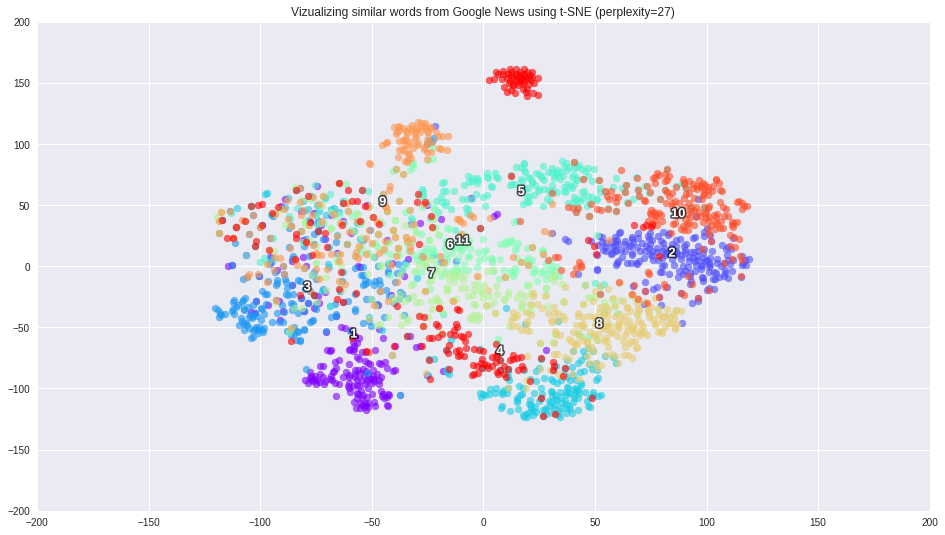

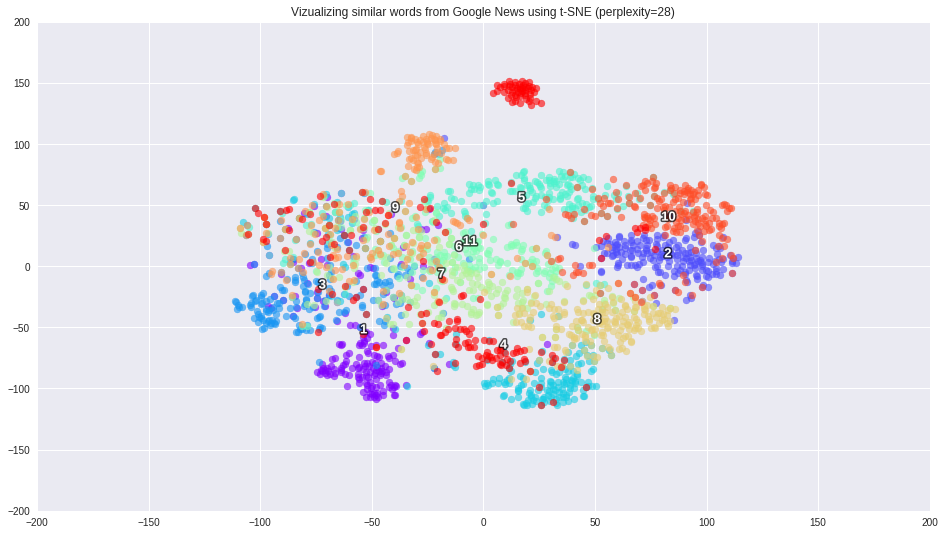

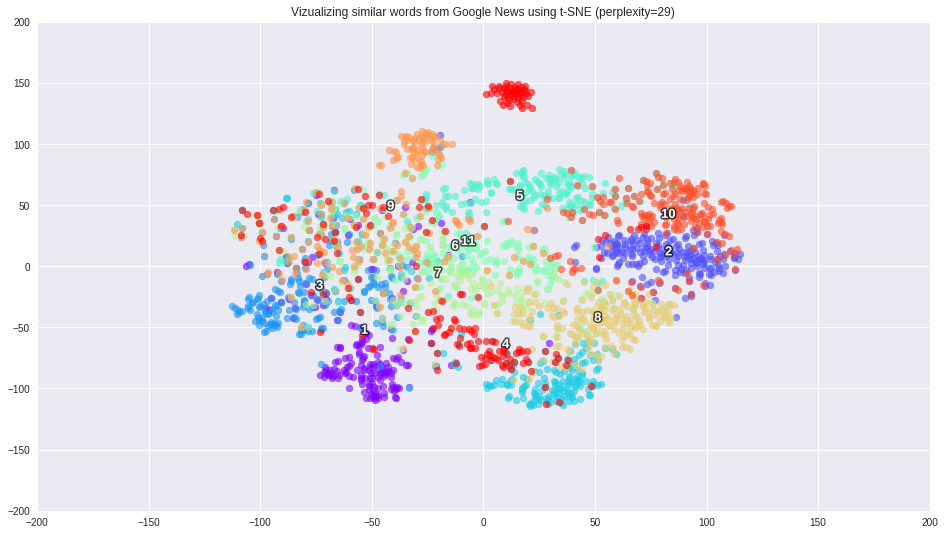

In [12]:
import matplotlib.patheffects as PathEffects
import tempfile
import imageio
import shutil

def tsne_plot_similar_words_png(title, embedding_clusters, a, filename):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(embedding_clusters)))
    i = 1
    for embeddings, color in zip(embedding_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a)
        plt.text(x.mean(), y.mean(), str(i), color='white', weight='bold', fontsize=13, path_effects=[PathEffects.withStroke(linewidth=3,
                                                                          foreground="black", alpha=0.7)])
        i += 1
    plt.title(title)
    plt.grid(True)
    plt.xlim(-200, 200)
    plt.ylim(-200, 200)
    plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    

dirpath = tempfile.mkdtemp()
images = []
for i in range(1, 30):
    fname = str(i) + '.png'
    tsne_model_en_2d_gif = TSNE(perplexity=i, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d_gif = np.array(tsne_model_en_2d_gif.fit_transform(embedding_clusters_gif.reshape(n * m, k))).reshape(n, m, 2)
    tsne_plot_similar_words_png('Vizualizing similar words from Google News using t-SNE (perplexity={})'.format(i), embeddings_en_2d_gif, 0.6, fname)
    images.append(imageio.imread(fname))
imageio.mimsave("2d1.gif", images, duration = 0.5)
shutil.rmtree(dirpath)

In [0]:
imageio.mimsave("2d55.gif", images, duration = 0.5)

# Homework (10 points)
## Spelling correction with FastText (3 points)

Implement a function that takes a word with mistakes and returns the most similar words from model vocabulary.

In [0]:
def spell_check(word_with_mistakes: str, pretrained_model, top_n=5):
  # word_with_mistakes --- string, e. g. 'tweeter'
  # pretrained_model --- a gensim model. It must have method 'most_similar'
  # top_n --- integer, how many variants to return
  #
  # res --- a list of pairs (word, similarity)
  # YOUR CODE HERE
  return res

Test it on several examples. Does it work well?

## Word analogies in distributional space (7 points)

Implement and compare 3 different similarity functions from here: http://www.aclweb.org/anthology/W14-1618. Test them on several examples. In your opinion, which is better and why? Do the same for GloVe embeddings. Are results the same?

In [0]:
# YOUR CODE HERE